In [3]:
import numpy as np
import fixed_income_derivatives_E2025 as fid
from scipy.linalg import sqrtm
import matplotlib.pyplot as plt

M = 6
alpha = 1
strike = 0.045
R = np.array([np.nan,0.03731561,0.04106146,0.04370112,0.04556125,0.04687207])
sigma_market_1b = np.array([0,0,0.041,0.052,0.065,0.083])
sigma_market_1d = np.array([0,0,0.045,0.057,0.073,0.096])

In [4]:
# Problem 1
strike = 0.045
T = np.array([m*alpha for m in range(0,M)])
p = np.ones(M)
L, price_caplet_1b = np.zeros([M]), np.zeros(M)
sigma_lmm = np.ones(M)
for i in range(1,M):
    p[i] = np.exp(-R[i]*T[i])
    L[i] = (1/alpha)*(p[i-1] - p[i])/p[i]
    if i > 1:
        price_caplet_1b[i] = fid.black_caplet_price(sigma_market_1b[i],T[i],strike,alpha,p[i],L[i],type_option = 'call')
print(f"1Y forward LIBOR rates: {L}")
print(f"ZCB prices: {p}")
print(f"caplet prices: {price_caplet_1b}")
price_cap_1b = sum(price_caplet_1b)
print(f"cap price: {price_cap_1b*10000}.")
R_swap_1b, S_swap_1b = fid.swap_rate_from_zcb_prices(0,0,5,"annual",T,p)
print(f"R_swap_1b: {R_swap_1b}, S_swap_1b: {S_swap_1b}")
premium_1b = price_cap_1b/S_swap_1b
print(f"cap annual premium_1b: {premium_1b*10000}")
price_cap_1c = sum(price_caplet_1b[3:])
print(f"cap price: {price_cap_1c*10000}.")
R_swap_1c, S_swap_1c = fid.swap_rate_from_zcb_prices(0,2,5,"annual",T,p)
print(f"R_swap_1c: {R_swap_1c}, S_swap_1c: {S_swap_1c}")
premium_1c = price_cap_1c/S_swap_1c
print(f"cap annual premium: {premium_1c*10000}")

strike = 0.05
prics_caplet_1d = np.zeros(M)
for i in range(2,M):
    prics_caplet_1d[i] = fid.black_caplet_price(sigma_market_1d[i],T[i],strike,alpha,p[i],L[i],type_option = 'call')
print(f"caplet prices: {prics_caplet_1d}")
price_cap_1d = sum(prics_caplet_1d)
print(f"cap price: {price_cap_1d*10000}.")
R_swap_1d, S_swap_1d = fid.swap_rate_from_zcb_prices(0,0,5,"annual",T,p)
print(f"R_swap_1d: {R_swap_1d}, S_swap_1d: {S_swap_1d}")
premium_1d = price_cap_1d/S_swap_1d
print(f"cap annual premium_1d: {premium_1d*10000}")



1Y forward LIBOR rates: [0.         0.03802058 0.04582632 0.05019981 0.05247195 0.05349726]
ZCB prices: [1.         0.96337204 0.92115872 0.87712711 0.83339713 0.7910767 ]
caplet prices: [0.         0.         0.00139536 0.00476539 0.00653331 0.00740222]
cap price: 200.96271265421674.
R_swap_1b: 0.04763270099674098, S_swap_1b: 4.3861317034117775
cap annual premium_1b: 45.8177561102182
cap price: 187.00915205778614.
R_swap_1c: 0.05199950984678004, S_swap_1c: 2.501600942990318
cap annual premium: 74.7557889206112
caplet prices: [0.         0.         0.00010993 0.00181913 0.00364917 0.00505373]
cap price: 106.31953854258.
R_swap_1d: 0.04763270099674098, S_swap_1d: 4.3861317034117775
cap annual premium_1d: 24.239932982376875


Problem 3b - Black implied volatilities
[[       nan 0.05091813 0.06600032 0.07828664 0.09099677]
 [       nan 0.0464215  0.05768167 0.06932318 0.08183585]
 [       nan 0.04291383 0.05649263 0.06722762 0.07621399]]
Problem 3c - Diffusion coefficients in the 'constant' LIBOR market model
beta vector: [0.06564992 0.07064533 0.08004751 0.09149526]
caplet_price for a strike of 0.0475 is [ 0.         47.57472249 39.5942857  43.26025173], cap price: 130.42925991119074


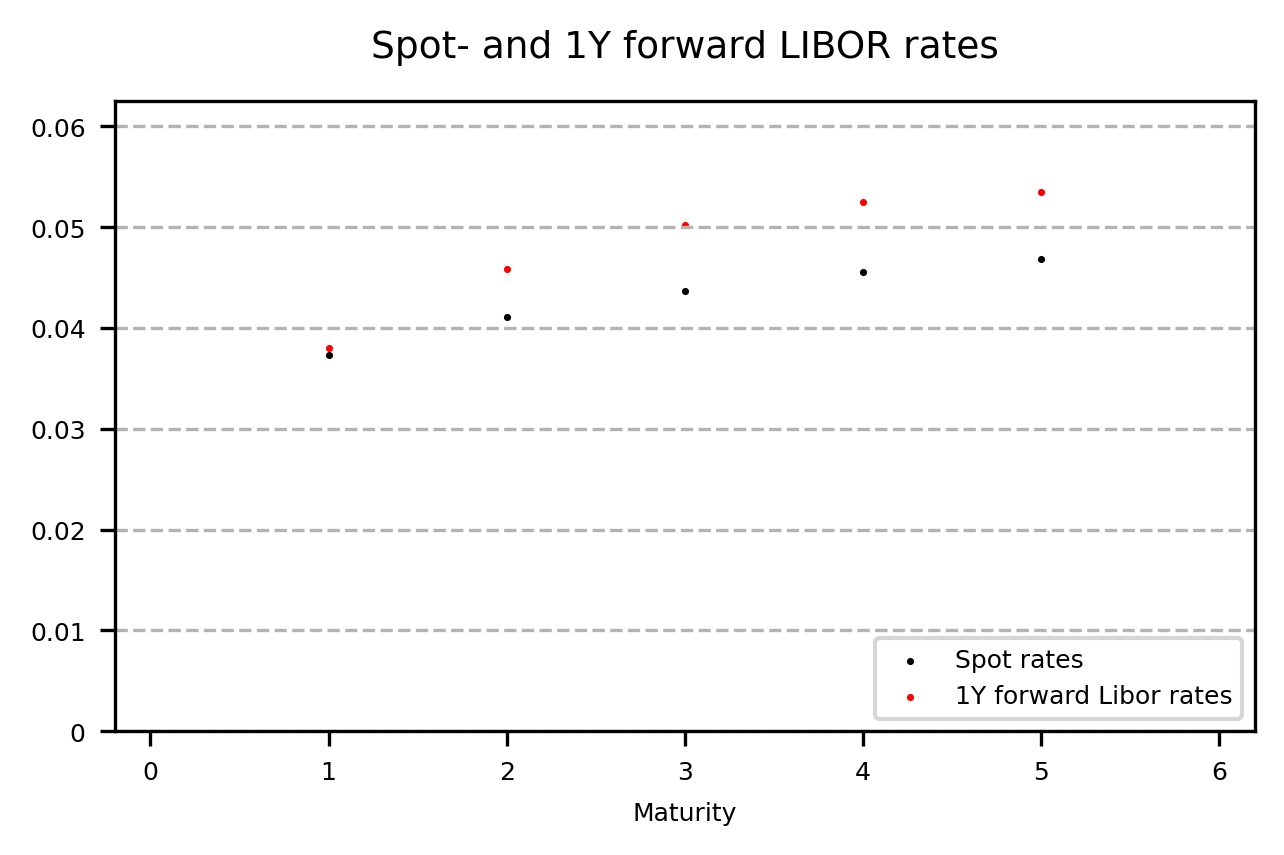

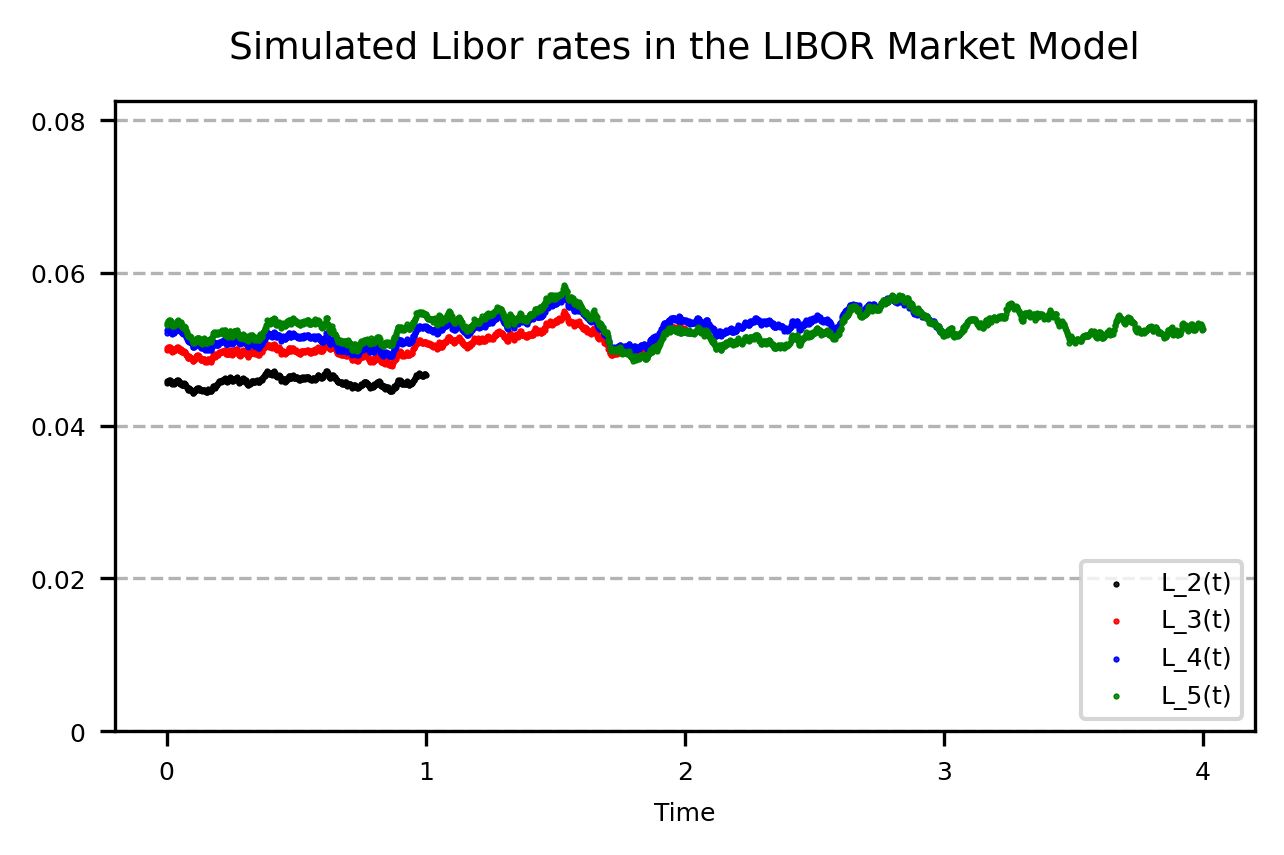

In [5]:
# Problem 3 - Constructing the LIBOR market model
L_3 = np.array([np.nan,0.03802058,0.04582632,0.05019981,0.05247195,0.05349726])
caplet_spread = np.array([[np.nan,29,37,46,56],[np.nan,12,20,29,39],[np.nan,3,10,18,26]])
offset = np.array([-25,0,25])
p_spot = np.ones([M])
p_1Y_forward = np.ones([M-1])
for i in range(0,M-1):
    p_1Y_forward[i] = 1/(1+alpha*L_3[i+1])
    p_spot[i+1] = p_spot[i]*p_1Y_forward[i]
sigma_market_3 = np.nan*np.ones([3,M-1])
for i in range(0,3):
    for j in range(2,M):
        sigma_market_3[i,j-1] = fid.black_caplet_iv(p_spot[j]*alpha*caplet_spread[i,j-1]/10000,T[j],L_3[j]+offset[i]/10000,alpha,p_spot[j],L_3[j],type_option = "call")
print(f"Problem 3b - Black implied volatilities")
print(sigma_market_3)

print(f"Problem 3c - Diffusion coefficients in the 'constant' LIBOR market model")
N = M - 2
y = sigma_market_3[1,1:]**2*T[2:]
A = alpha*np.eye(N)*T[1:1+N]
beta_sq = (np.linalg.solve(A,y))
beta = np.sqrt(beta_sq)
print(f"beta vector: {beta}")

Mps, N_simul = 500, 1
strike_lmm = 0.0475
rho = np.array([[1,0.95,0.9,0.85],[0.95,1,0.95,0.9],[0.9,0.95,1,0.95],[0.85,0.9,0.95,1]])
delta = alpha/Mps
t_simul = np.array([i*delta for i in range(0,(M-2)*Mps+1)])
caplet_price_3 = np.zeros(M-2)
chi_disc = np.zeros([M-2,N_simul])
for n in range(0,N_simul):
    L_simul = fid.simul_lmm(L[2:M],T[1:M],sigma_market_3[1,1:],rho,Mps)
    for j in range(0,M-2):
        chi_disc[j,n] = p[-1]*alpha*max(L_simul[j,int((j+1)*Mps)] - strike_lmm,0)
        for k in range(j,M-2):
            chi_disc[j,n] *= (1+alpha*L_simul[k,int((k+1)*Mps)])
for i in range(0,M-2):
    caplet_price_3[i] = sum(chi_disc[i,:])/N_simul*10000
print(f"caplet_price for a strike of {strike_lmm} is {caplet_price_3}, cap price: {sum(caplet_price_3)}")

fig = plt.figure(constrained_layout=False, dpi = 300, figsize = (5,3))
fig.suptitle(f"Spot- and 1Y forward LIBOR rates", fontsize = 9)
gs = fig.add_gridspec(nrows=1,ncols=1,left=0.12,bottom=0.2,right=0.88,top=0.90,wspace=0,hspace=0)
ax = fig.add_subplot(gs[0,0])
xticks = [0,1,2,3,4,5,6]
ax.set_xticks(xticks)
ax.set_xticklabels(xticks,fontsize = 6)
ax.set_xlim([xticks[0]+-0.2,xticks[-1]+0.2])
plt.xlabel(f"Maturity",fontsize = 6)
ax.set_yticks([0,0.01,0.02,0.03,0.04,0.05,0.06])
ax.set_yticklabels([0,0.01,0.02,0.03,0.04,0.05,0.06],fontsize = 6)
ax.set_ylim([0,0.0625])
plt.grid(axis = 'y', which='major', color=(0.7,0.7,0.7,0), linestyle='--')
p1 = ax.scatter(T[1:], R[1:], s = 2, color = 'black', marker = ".",label="Spot rates")
p2 = ax.scatter(T[1:], L[1:], s = 2, color = 'red', marker = ".",label="1Y forward Libor rates")
plots = [p1,p2]
labels = [item.get_label() for item in plots]
ax.legend(plots,labels,loc="lower right",fontsize = 6)

fig = plt.figure(constrained_layout=False, dpi = 300, figsize = (5,3))
fig.suptitle(f"Simulated Libor rates in the LIBOR Market Model", fontsize = 9)
gs = fig.add_gridspec(nrows=1,ncols=1,left=0.12,bottom=0.2,right=0.88,top=0.90,wspace=0,hspace=0)
ax = fig.add_subplot(gs[0,0])
xticks = np.array([0,1,2,3,4])
ax.set_xticks(xticks)
ax.set_xticklabels(xticks,fontsize = 6)
ax.set_xlim([xticks[0]+-0.2,xticks[-1]+0.2])
# ax.set_xlim([xticks[0]+-0.2,2+0.2])
plt.xlabel(f"Time",fontsize = 6)
ax.set_yticks([0,0.02,0.04,0.06,0.08])
ax.set_yticklabels([0,0.02,0.04,0.06,0.08],fontsize = 6)
ax.set_ylim([0,0.0825])
plt.grid(axis = 'y', which='major', color=(0.7,0.7,0.7,0), linestyle='--')
p1 = ax.scatter(t_simul, L_simul[0,:], s = 1, color = 'black', marker = ".",label="L_2(t)")
p2 = ax.scatter(t_simul, L_simul[1,:], s = 1, color = 'red', marker = ".",label="L_3(t)")
p3 = ax.scatter(t_simul, L_simul[2,:], s = 1, color = 'blue', marker = ".",label="L_4(t)")
p4 = ax.scatter(t_simul, L_simul[3,:], s = 1, color = 'green', marker = ".",label="L_5(t)")
plots = [p1,p2,p3,p4]
labels = [item.get_label() for item in plots]
ax.legend(plots,labels,loc="lower right",fontsize = 6)
# plt.show()




In [6]:
# Problem 4
EURIBOR_fixing = [{"id": 0,"instrument": "libor","maturity": 1/2, "rate": 0.04777}]
fra_market = [{"id": 1,"instrument": "fra","exercise": 1/12,"maturity": 7/12, "rate": 0.04546},
{"id": 2,"instrument": "fra","exercise": 2/12,"maturity": 8/12, "rate": 0.04335},
{"id": 3,"instrument": "fra","exercise": 3/12,"maturity": 9/12, "rate": 0.04145},
{"id": 4,"instrument": "fra","exercise": 4/12,"maturity": 10/12, "rate": 0.03974},
{"id": 5,"instrument": "fra","exercise": 5/12,"maturity": 11/12, "rate": 0.03819},
{"id": 6,"instrument": "fra","exercise": 6/12,"maturity": 12/12, "rate": 0.03681},
{"id": 7,"instrument": "fra","exercise": 7/12,"maturity": 13/12, "rate": 0.03557},
{"id": 8,"instrument": "fra","exercise": 8/12,"maturity": 14/12, "rate": 0.03446},
{"id": 9,"instrument": "fra","exercise": 9/12,"maturity": 15/12, "rate": 0.03348}]
swap_market = [{"id": 10,"instrument": "swap","maturity": 2, "rate": 0.03659, "float_freq": "semiannual", "fixed_freq": "annual","indices": []},
{"id": 11,"instrument": "swap","maturity": 3, "rate": 0.03416, "float_freq": "semiannual", "fixed_freq": "annual","indices": []},
{"id": 12,"instrument": "swap","maturity": 4, "rate": 0.03354, "float_freq": "semiannual", "fixed_freq": "annual","indices": []},
{"id": 13,"instrument": "swap","maturity": 5, "rate": 0.03373, "float_freq": "semiannual", "fixed_freq": "annual","indices": []},
{"id": 14,"instrument": "swap","maturity": 7, "rate": 0.03489, "float_freq": "semiannual", "fixed_freq": "annual","indices": []},
{"id": 15,"instrument": "swap","maturity": 10, "rate": 0.03656, "float_freq": "semiannual", "fixed_freq": "annual","indices": []},
{"id": 16,"instrument": "swap","maturity": 15, "rate": 0.03820, "float_freq": "semiannual", "fixed_freq": "annual","indices": []},
{"id": 17,"instrument": "swap","maturity": 20, "rate": 0.03904, "float_freq": "semiannual", "fixed_freq": "annual","indices": []},
{"id": 18,"instrument": "swap","maturity": 30, "rate": 0.03985, "float_freq": "semiannual", "fixed_freq": "annual","indices": []}]
data = EURIBOR_fixing + fra_market + swap_market

caplet_spread = np.array([np.nan,np.nan,11,14,20,27,35,42,50,57,64])

mesh = 1/12
N = 10
alpha = 1

# interpolation_options = {"method":"linear","transition": "smoo"}
interpolation_options = {"method":"hermite","degree":3,"transition": "smooth"}
# interpolation_options = {"method":"nelson_siegel","transition": "smooth"}

T_fit, R_fit = fid.zcb_curve_fit(data,interpolation_options = interpolation_options)
T_inter = np.array([i*mesh for i in range(0,int(30/mesh)+1)])
p_inter, R_inter, f_inter, T_inter = fid.zcb_curve_interpolate(T_inter,T_fit,R_fit,interpolation_options = interpolation_options)
T_1Y_libor, L_1Y_libor = np.array([i for i in range(0,N+1)]), np.nan*np.ones([N+1])
p_1Y_libor = fid.for_values_in_list_find_value_return_value(T_1Y_libor,T_inter,p_inter)
L_1Y_libor = fid.forward_rates_from_zcb_prices(T_1Y_libor,p_1Y_libor,horizon = 1,method = "simple")
print(f"Forward 1Y LIBOR rates: {L_1Y_libor}")
print(f"Forward 1Y ZCB prices: {p_1Y_libor}")

iv = np.nan*np.ones([N+1])
for i in range(2,N+1):
    iv[i] = fid.black_caplet_iv(p_1Y_libor[i]*caplet_spread[i]/10000,T_1Y_libor[i],L_1Y_libor[i],alpha,p_1Y_libor[i],L_1Y_libor[i],type_option = "call")
print(f"iv: {iv}")



Forward 1Y LIBOR rates: [       nan 0.0427296  0.03026458 0.02908297 0.03156417 0.03455298
 0.03722599 0.03912836 0.04033015 0.04148154 0.04201923]
Forward 1Y ZCB prices: [np.float64(1.0), np.float64(0.9590213960698457), np.float64(0.9308496195381755), np.float64(0.9045428232622682), np.float64(0.8768652977591037), np.float64(0.8475789178232618), np.float64(0.8171593517057332), np.float64(0.7863892323820816), np.float64(0.7559035274923196), np.float64(0.7257963772243567), np.float64(0.6965287728443267)]
iv: [       nan        nan 0.0644441  0.06970794 0.07949738 0.08773627
 0.09643727 0.10200347 0.11031739 0.11538588 0.12147459]


In [7]:
# Simulating the Libor rates in the regular and reverse LIBOR market model
Mps = 250
rho_param = 0.95
rho = np.identity(N-1)
for i in range(0,N-1):
    for j in range(i+1,N-1):
        rho[i,j] = rho[i,j-1]*rho_param
    for j in range(i-1,-1,-1):
        rho[i,j] = rho[i,j+1]*rho_param
eigen_values = np.linalg.eigvals(rho)
print(f"eigenvalues of rho: {eigen_values}")

delta = alpha/Mps
t_simul = np.array([i*delta for i in range(0,(N-1)*Mps+1)])
L_simul_regular = fid.simul_lmm(L_1Y_libor[2:N+1],T_1Y_libor[1:N+1],iv[2:],rho,Mps,method_sigma = "step_wise_constant_regular",seed = 12)
L_simul_reverse = fid.simul_lmm(L_1Y_libor[2:N+1],T_1Y_libor[1:N+1],iv[2:],rho,Mps,method_sigma = "step_wise_constant_reverse",seed = 12)



eigenvalues of rho: [7.78415876 0.71130546 0.20930389 0.10066152 0.06150676 0.04350097
 0.03411611 0.02901349 0.02643304]


In [8]:
# Computing the price of a 5Y5Y payer swap
T_n, T_N = 5, 10
alpha = 1
Mps, N_simul = 250, 1000
F_swap, S_swap = fid.swap_rate_from_zcb_prices(0,T_n,T_N,"annual",T_1Y_libor,p_1Y_libor)
print(f"F_swap: {F_swap}, S_swap: {S_swap}")
T_swap = np.array([i*alpha for i in range(0,int((T_N-T_n)/alpha)+1)])
p_swap_regular, p_swap_reverse = np.ones([int((T_N-T_n)/alpha)+1]), np.ones([int((T_N-T_n)/alpha)+1])
rho = np.identity(N-1)
for i in range(0,int(T_N/alpha)-1):
    for j in range(i+1,int(T_N/alpha)-1):
        rho[i,j] = rho[i,j-1]*rho_param
    for j in range(i-1,-1,-1):
        rho[i,j] = rho[i,j+1]*rho_param

delta = alpha/Mps
t_simul_swap = np.array([i*delta for i in range(0,int(T_n/alpha)*Mps+1)])
chi_disc, chi_disc_plot = np.zeros([N_simul,2]), np.zeros([N_simul,2])
for n in range(0,N_simul):
    L_simul_regular_swap = fid.simul_lmm(L_1Y_libor[2:N+1],T_1Y_libor[1:N+1],iv[2:],rho,Mps,method_sigma = "step_wise_constant_regular",T_simul = T_n,seed = n)
    for j in range(0,int((T_N-T_n)/alpha)):
        p_swap_regular[j+1] = p_swap_regular[j]/(1+alpha*L_simul_regular_swap[int(T_n/alpha)-1+j,-1])
    R_swap_regular, S_swap_regular = fid.swap_rate_from_zcb_prices(0,0,T_N-T_n,"annual",T_swap,p_swap_regular)
    chi_disc[n,0] += S_swap_regular*max(F_swap-R_swap_regular,0)*(p_1Y_libor[T_N]/p_swap_regular[-1])
    chi_disc_plot[n,0] = sum(chi_disc[0:n+1,0])/(n+1)
    L_simul_reverse_swap = fid.simul_lmm(L_1Y_libor[2:N+1],T_1Y_libor[1:N+1],iv[2:],rho,Mps,method_sigma = "step_wise_constant_reverse",T_simul = T_n,seed = n)
    for j in range(0,int((T_N-T_n)/alpha)):
        p_swap_reverse[j+1] = p_swap_reverse[j]/(1+alpha*L_simul_reverse_swap[int(T_n/alpha)-1+j,-1])
    R_swap_reverse, S_swap_reverse = fid.swap_rate_from_zcb_prices(0,0,T_N-T_n,"annual",T_swap,p_swap_reverse)
    chi_disc[n,1] += S_swap_reverse*max(F_swap-R_swap_reverse,0)*(p_1Y_libor[T_N]/p_swap_reverse[-1])
    chi_disc_plot[n,1] = sum(chi_disc[0:n+1,1])/(n+1)

price_receiver_swaption_regular = sum(chi_disc[:,0])/N_simul*10000
price_receiver_swaption_reverse = sum(chi_disc[:,1])/N_simul*10000
print(f"price_receiver_swaption_regular: {price_receiver_swaption_regular}")
print(f"price_receiver_swaption_reverse: {price_receiver_swaption_reverse}")



F_swap: 0.03994157628233206, S_swap: 3.7817772616488177
price_receiver_swaption_regular: 249.1428420871167
price_receiver_swaption_reverse: 318.02265710837776


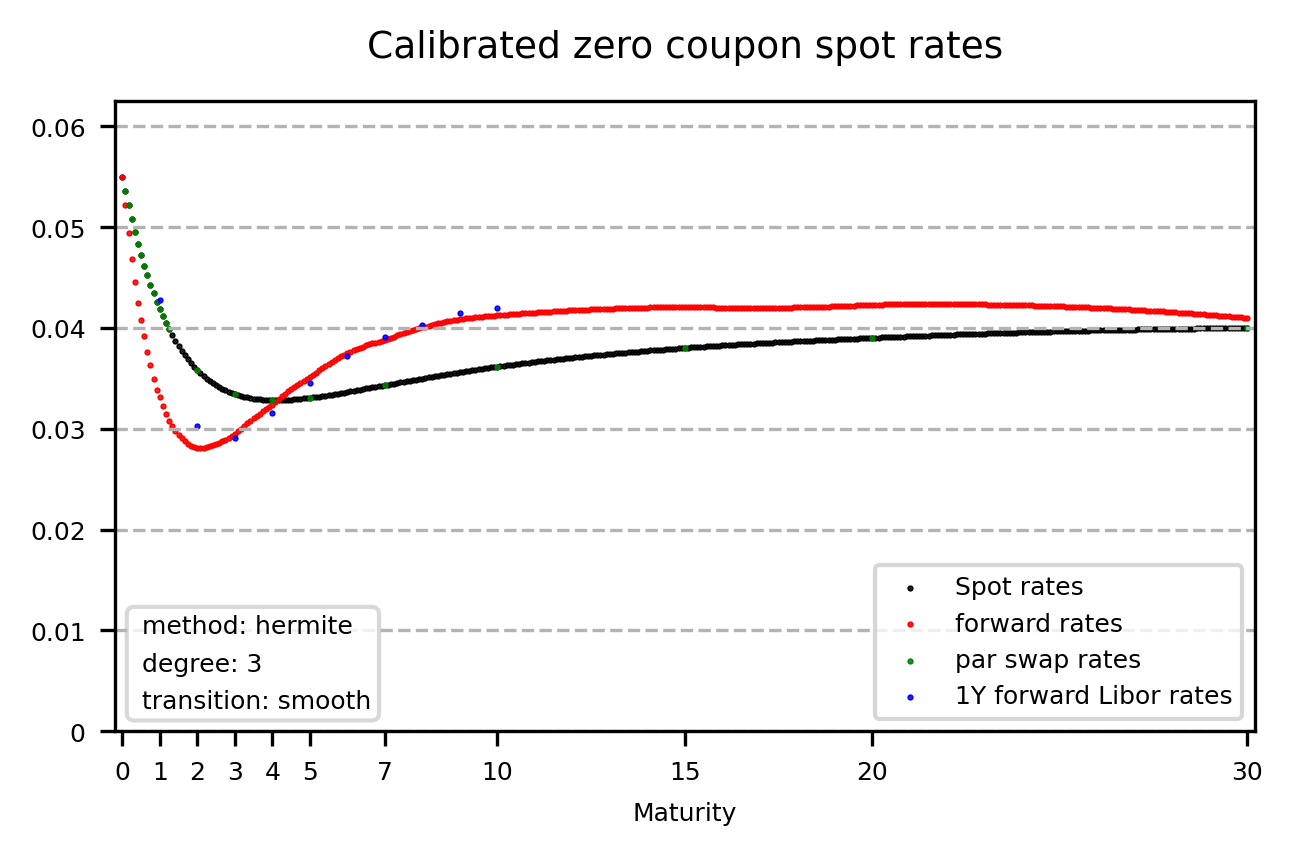

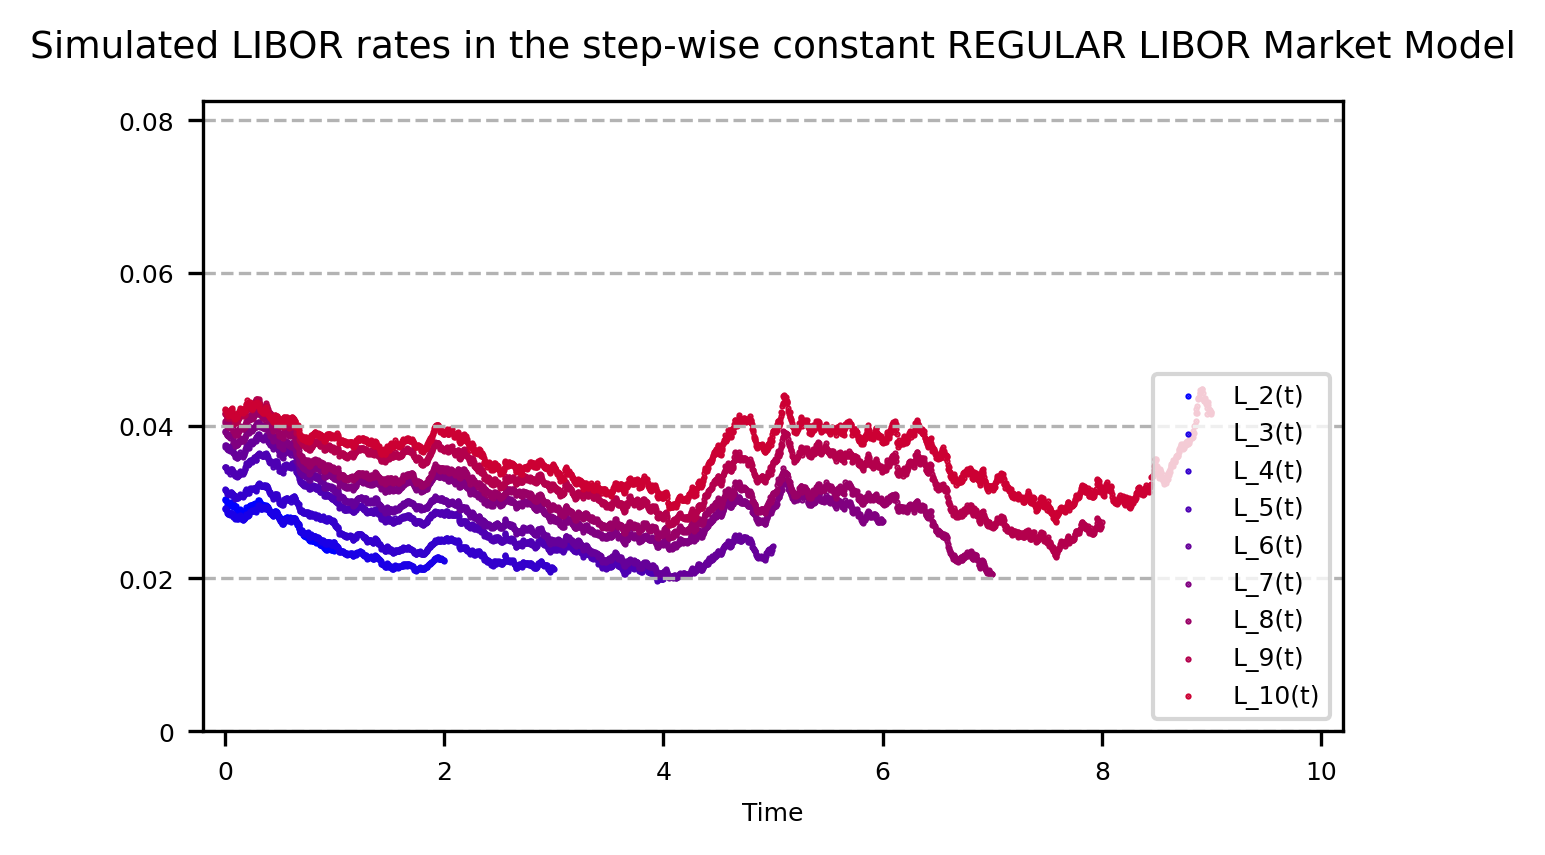

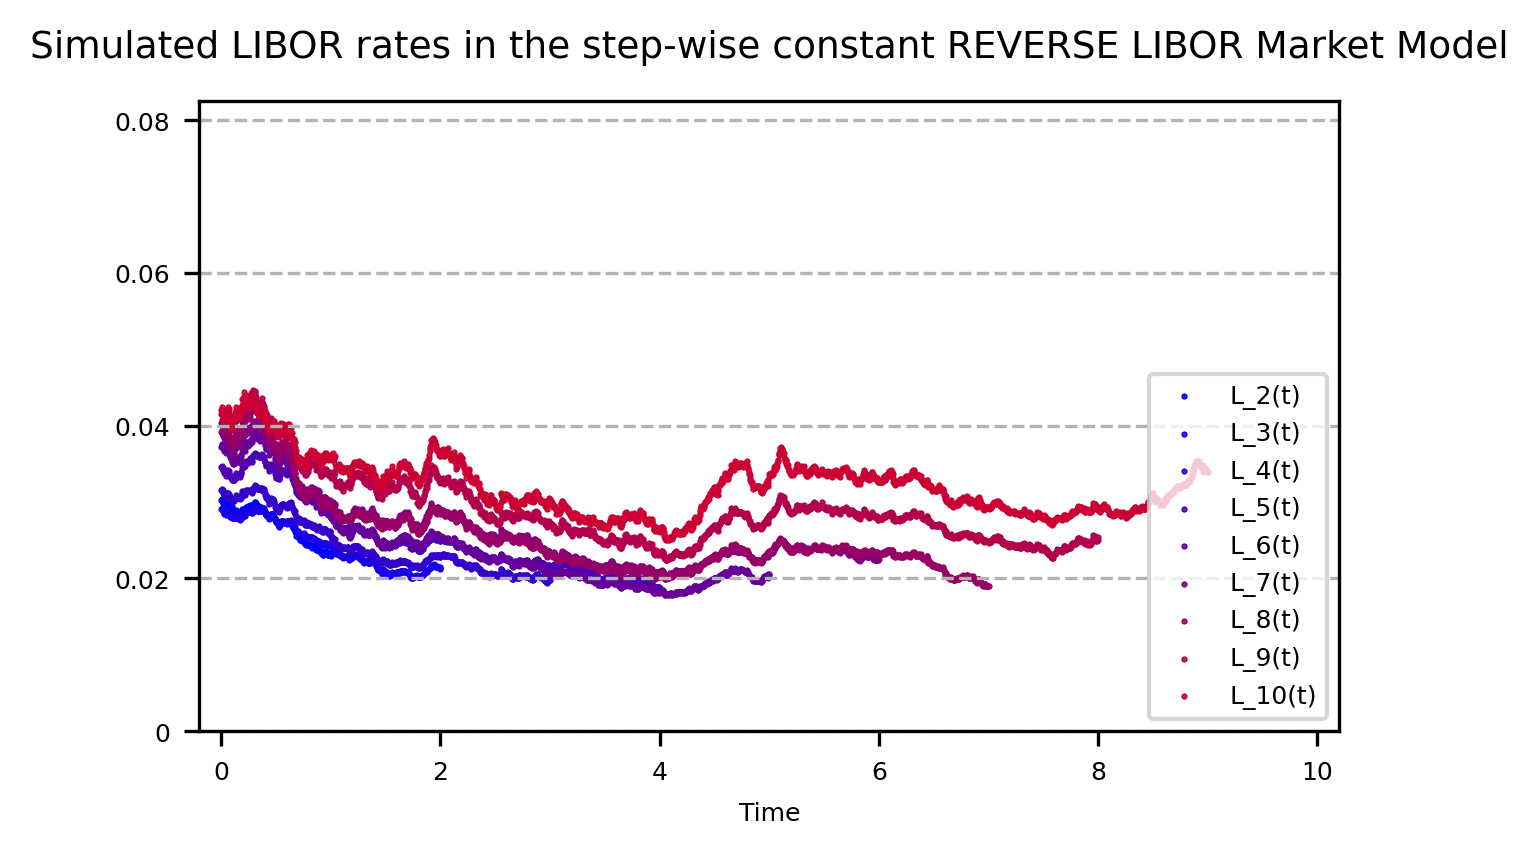

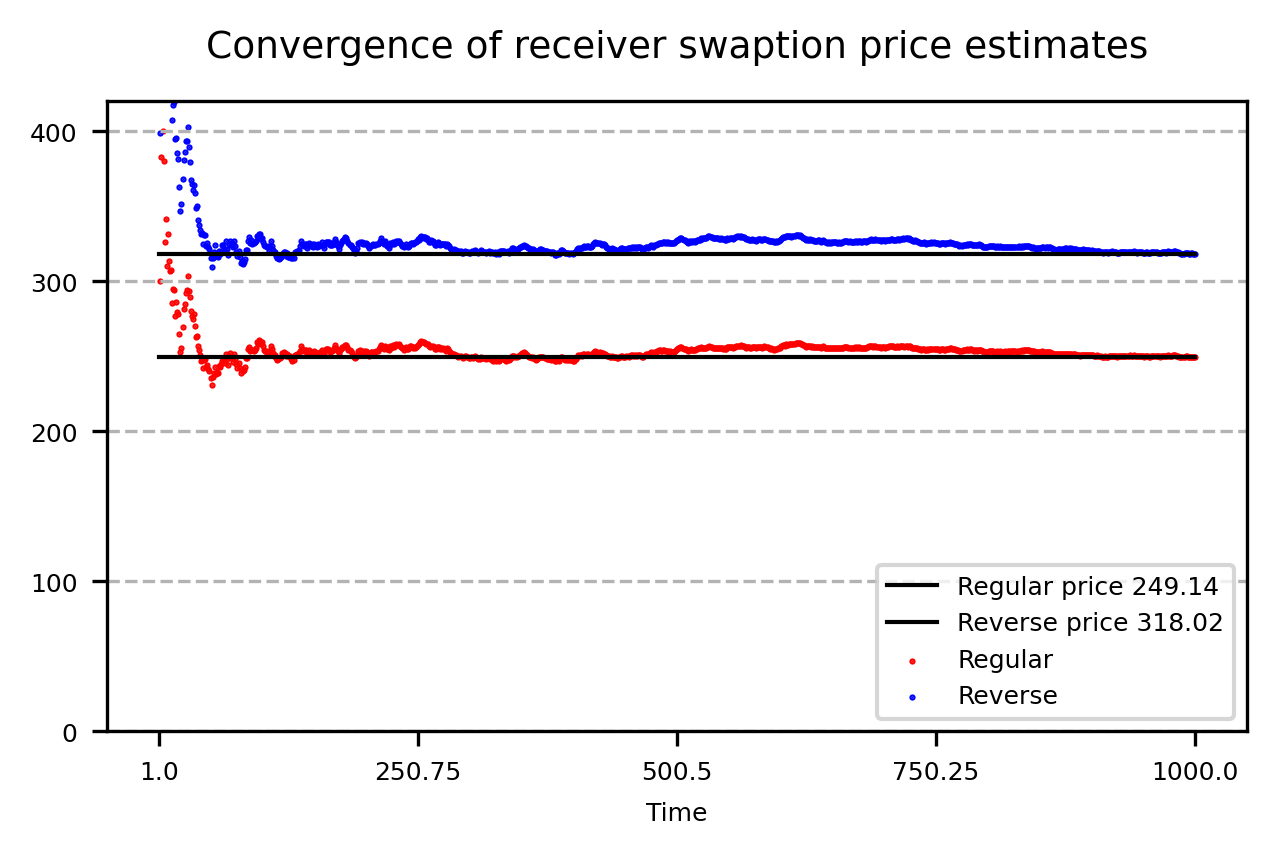

In [9]:
fig = plt.figure(constrained_layout=False, dpi = 300, figsize = (5,3))
fig.suptitle(f"Calibrated zero coupon spot rates", fontsize = 9)
gs = fig.add_gridspec(nrows=1,ncols=1,left=0.12,bottom=0.2,right=0.88,top=0.90,wspace=0,hspace=0)
ax = fig.add_subplot(gs[0,0])
xticks = [0,1,2,3,4,5,7,10,15,20,30]
ax.set_xticks(xticks)
ax.set_xticklabels(xticks,fontsize = 6)
ax.set_xlim([xticks[0]+-0.2,xticks[-1]+0.2])
plt.xlabel(f"Maturity",fontsize = 6)
ax.set_yticks([0,0.01,0.02,0.03,0.04,0.05,0.06])
ax.set_yticklabels([0,0.01,0.02,0.03,0.04,0.05,0.06],fontsize = 6)
ax.set_ylim([0,0.0625])
plt.grid(axis = 'y', which='major', color=(0.7,0.7,0.7,0), linestyle='--')
p1 = ax.scatter(T_inter[0:], R_inter[0:], s = 1, color = 'black', marker = ".",label="Spot rates")
p2 = ax.scatter(T_inter[0:], f_inter[0:], s = 1, color = 'red', marker = ".",label="forward rates")
p3 = ax.scatter(T_fit, R_fit, s = 1, color = 'green', marker = ".",label="par swap rates")
p4 = ax.scatter(T_1Y_libor, L_1Y_libor, s = 1, color = 'blue', marker = ".",label="1Y forward Libor rates")
plots = [p1,p2,p3,p4]
labels = [item.get_label() for item in plots]
ax.legend(plots,labels,loc="lower right",fontsize = 6)
bbox = {"facecolor": (1,1,1,0.8),"edgecolor": (0.7,0.7,0.7,0.5),"boxstyle": "Round"}
if interpolation_options["method"] == "hermite":
    ax.text(0.32,0.0023,f" method: {interpolation_options['method']} \n degree: {interpolation_options['degree']} \n transition: {interpolation_options['transition']}", fontsize = 6,linespacing = 1.7, bbox = bbox)
else:
    ax.text(0.32,0.0023,f" method: {interpolation_options['method']} \n transition: {interpolation_options['transition']}", fontsize = 6,linespacing = 1.7, bbox = bbox)
# plt.show()

fig = plt.figure(constrained_layout=False, dpi = 300, figsize = (5,3))
fig.suptitle(f"Simulated LIBOR rates in the step-wise constant REGULAR LIBOR Market Model", fontsize = 9)
gs = fig.add_gridspec(nrows=1,ncols=1,left=0.12,bottom=0.2,right=0.88,top=0.90,wspace=0,hspace=0)
ax = fig.add_subplot(gs[0,0])
xticks = np.array([0,2,4,6,8,10])
ax.set_xticks(xticks)
ax.set_xticklabels(xticks,fontsize = 6)
ax.set_xlim([xticks[0]+-0.2,xticks[-1]+0.2])
plt.xlabel(f"Time",fontsize = 6)
ax.set_yticks([0,0.02,0.04,0.06,0.08])
ax.set_yticklabels([0,0.02,0.04,0.06,0.08],fontsize = 6)
ax.set_ylim([0,0.0825])
plt.grid(axis = 'y', which='major', color=(0.7,0.7,0.7,0), linestyle='--')
plots = []
for i in range(0,N-1):
    p = ax.scatter(t_simul, L_simul_regular[i,:], s = 1, color = (0+i*0.1,0,1-i*0.1,1), marker = ".",label=f"L_{i+2*alpha}(t)")
    plots.append(p)
labels = [item.get_label() for item in plots]
ax.legend(plots,labels,loc="lower right",fontsize = 6)

fig = plt.figure(constrained_layout=False, dpi = 300, figsize = (5,3))
fig.suptitle(f"Simulated LIBOR rates in the step-wise constant REVERSE LIBOR Market Model", fontsize = 9)
gs = fig.add_gridspec(nrows=1,ncols=1,left=0.12,bottom=0.2,right=0.88,top=0.90,wspace=0,hspace=0)
ax = fig.add_subplot(gs[0,0])
xticks = np.array([0,2,4,6,8,10])
ax.set_xticks(xticks)
ax.set_xticklabels(xticks,fontsize = 6)
ax.set_xlim([xticks[0]+-0.2,xticks[-1]+0.2])
plt.xlabel(f"Time",fontsize = 6)
ax.set_yticks([0,0.02,0.04,0.06,0.08])
ax.set_yticklabels([0,0.02,0.04,0.06,0.08],fontsize = 6)
ax.set_ylim([0,0.0825])
plt.grid(axis = 'y', which='major', color=(0.7,0.7,0.7,0), linestyle='--')
plots = []
for i in range(0,N-1):
    p = ax.scatter(t_simul, L_simul_reverse[i,:], s = 1, color = (0+i*0.1,0,1-i*0.1,1), marker = ".",label=f"L_{i+2*alpha}(t)")
    plots.append(p)
labels = [item.get_label() for item in plots]
ax.legend(plots,labels,loc="lower right",fontsize = 6)

fig = plt.figure(constrained_layout=False, dpi = 300, figsize = (5,3))
fig.suptitle(f"Convergence of receiver swaption price estimates", fontsize = 9)
gs = fig.add_gridspec(nrows=1,ncols=1,left=0.12,bottom=0.2,right=0.88,top=0.90,wspace=0,hspace=0)
ax = fig.add_subplot(gs[0,0])
x_values = np.array([i for i in range(1,N_simul+1)])
xticks = np.array([x_values[0],x_values[0]+(x_values[-1]-x_values[0])/4,x_values[0]+2*(x_values[-1]-x_values[0])/4,x_values[0]+3*(x_values[-1]-x_values[0])/4,x_values[-1]])
ax.set_xticks(xticks)
ax.set_xticklabels(xticks,fontsize = 6)
ax.set_xlim([xticks[0]-x_values[-1]/20,xticks[-1]+x_values[-1]/20])
plt.xlabel(f"Time",fontsize = 6)
ax.set_yticks([0,100,200,300,400])
ax.set_yticklabels([0,100,200,300,400],fontsize = 6)
ax.set_ylim([0,420])
plt.grid(axis = 'y', which='major', color=(0.7,0.7,0.7,0), linestyle='--')
p1 = ax.plot(x_values, price_receiver_swaption_regular*np.ones(N_simul), linewidth = 1, color = "black",label=f"Regular price {np.round(price_receiver_swaption_regular,2)}")[0]
p2 = ax.plot(x_values, price_receiver_swaption_reverse*np.ones(N_simul), linewidth = 1, color = "black",label=f"Reverse price {np.round(price_receiver_swaption_reverse,2)}")[0]
p3 = ax.scatter(x_values, 10000*chi_disc_plot[:,0], s = 1, color = "red", marker = ".",label=f"Regular")
p4 = ax.scatter(x_values, 10000*chi_disc_plot[:,1], s = 1, color = "blue", marker = ".",label=f"Reverse")
plots = [p1,p2,p3,p4]
labels = [item.get_label() for item in plots]
ax.legend(plots,labels,loc="lower right",fontsize = 6)
plt.show()
